In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import requests
import os
import seaborn as sns

In [8]:
combined = pd.read_pickle('../node_and_degree_list.pkl')
combined.head

thresh = 1000
small = combined.loc[combined.followers_count < thresh]
small = small.loc[small.followers_count < thresh]

In [27]:
small.head()

,twitter_id,followers_count,following_count,label
24,4307623643,59,4,bot
36,844779426260791296,768,1,bot
83,837316817324556289,182,6,bot
137,913028718377005056,87,147,bot
175,790017240733278208,19,47,bot


In [10]:
# Compare each metric for each network
m = pd.read_pickle('feature_data/mentions.pkl')
l = pd.read_pickle('feature_data/likes.pkl')
f = pd.read_pickle('feature_data/follows.pkl')

In [47]:
plt_metrics = ['In Degree', 'Out Degree', 'Clustering Coefficient', 'PageRank', 
               'AM1 - In Degree', 'AM1 - Out Degree', 
              'AM2 - In Degree', 'AM2 - Out Degree']
metrics = m.columns[1:-1]
networks = ['mentions', 'likes', 'follows']
n = [m, l, f]
for net, d in zip(networks, n):
    for metric in metrics:
        d[metric] = d[metric].astype(float)


/Users/julialromero/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/julialromero/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/julialromero/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/julialromero/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-49-e0d7fb6a250b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warni

<Figure size 300x300 with 0 Axes>

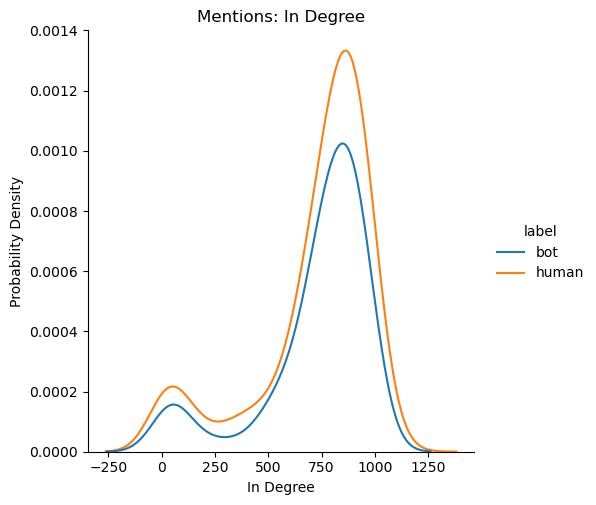

<Figure size 300x300 with 0 Axes>

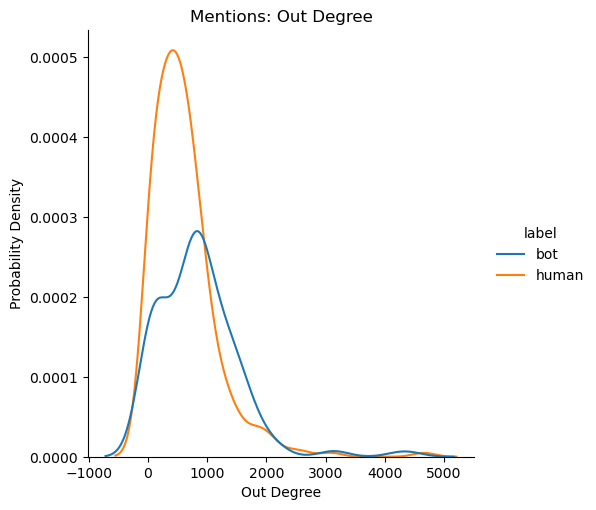

<Figure size 300x300 with 0 Axes>

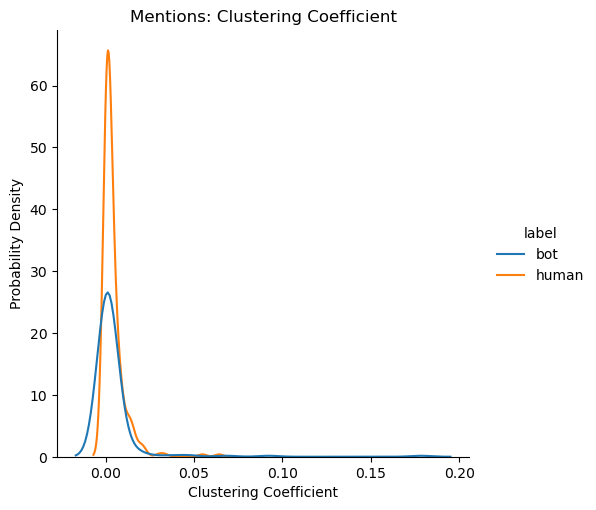

<Figure size 300x300 with 0 Axes>

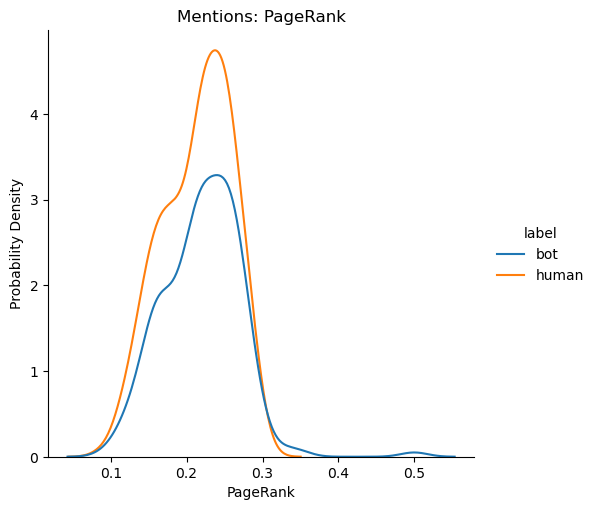

<Figure size 300x300 with 0 Axes>

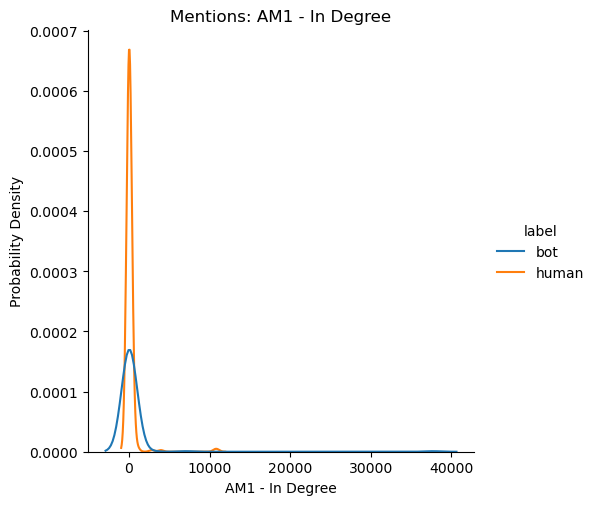

<Figure size 300x300 with 0 Axes>

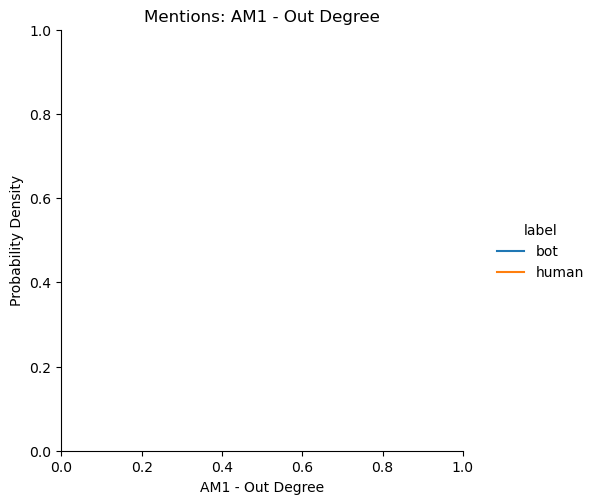

<Figure size 300x300 with 0 Axes>

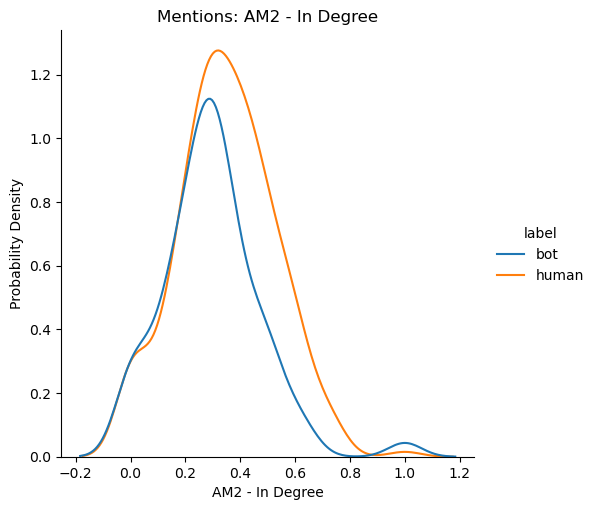

<Figure size 300x300 with 0 Axes>

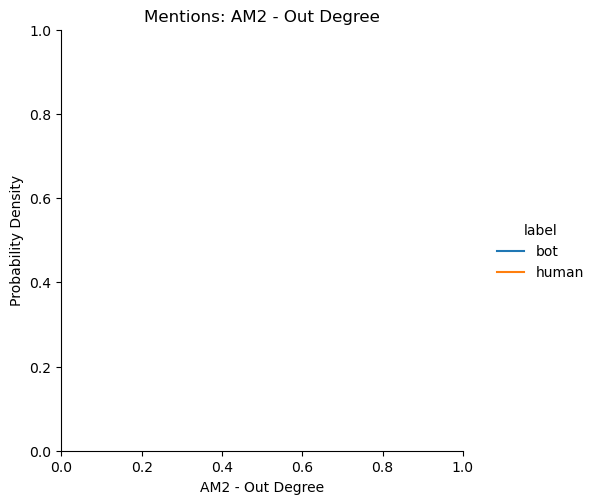

<Figure size 300x300 with 0 Axes>

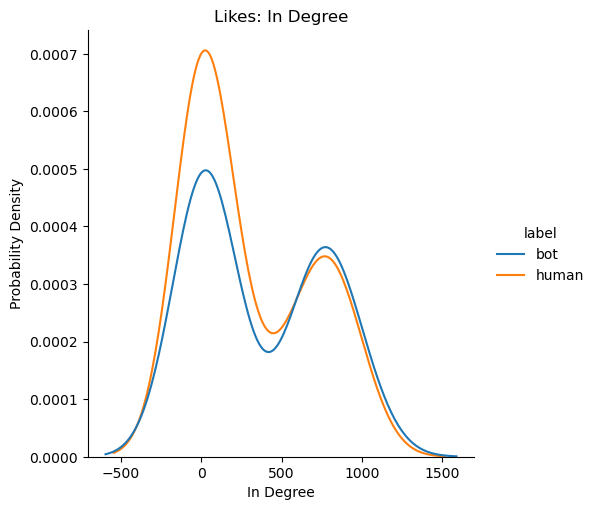

<Figure size 300x300 with 0 Axes>

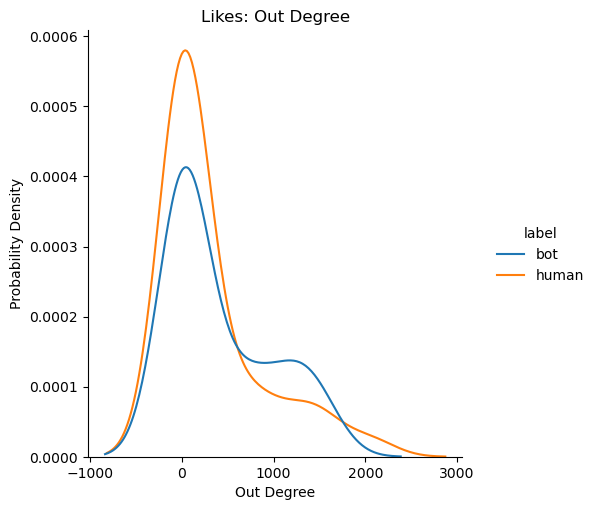

<Figure size 300x300 with 0 Axes>

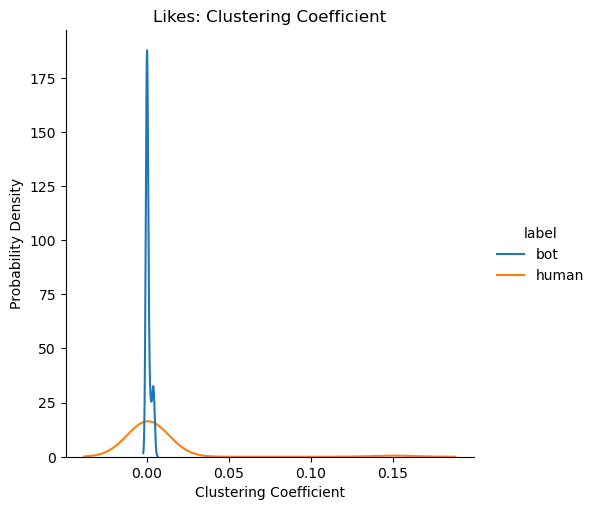

<Figure size 300x300 with 0 Axes>

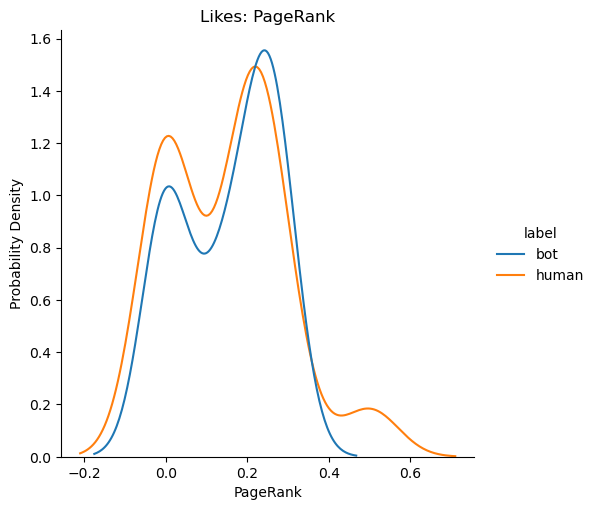

<Figure size 300x300 with 0 Axes>

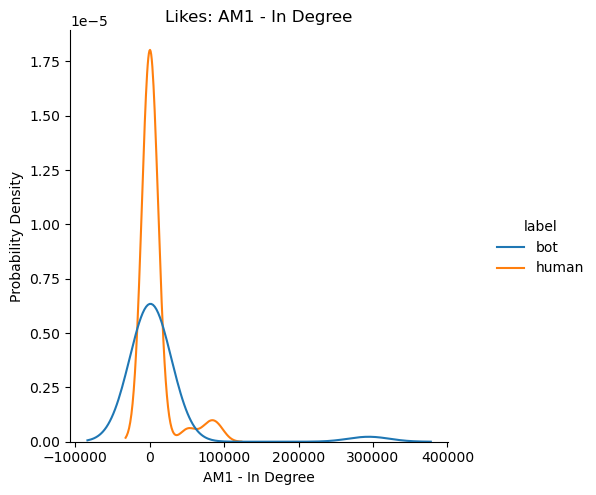

<Figure size 300x300 with 0 Axes>

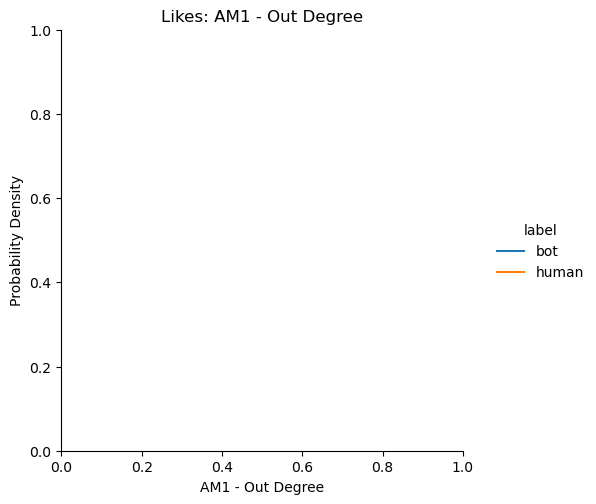

<Figure size 300x300 with 0 Axes>

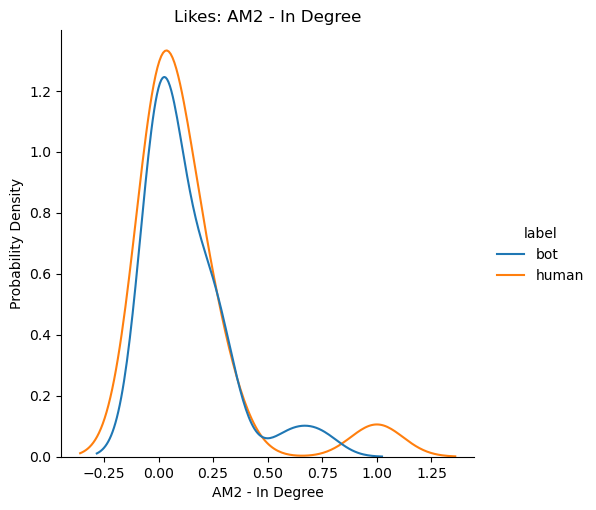

<Figure size 300x300 with 0 Axes>

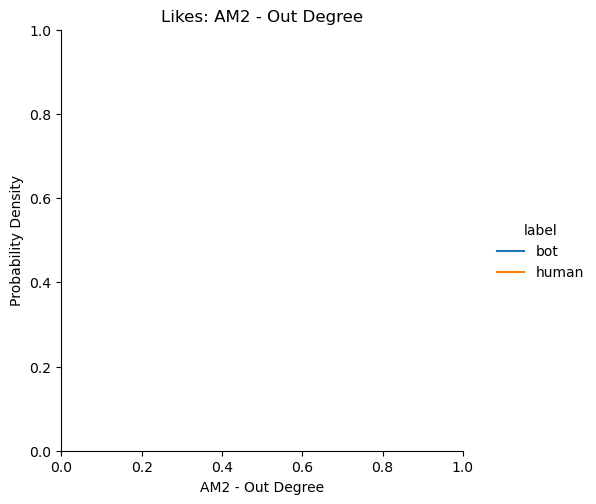

<Figure size 300x300 with 0 Axes>

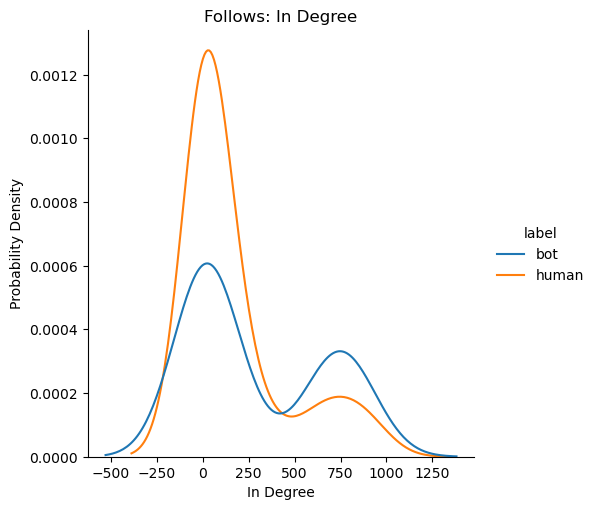

<Figure size 300x300 with 0 Axes>

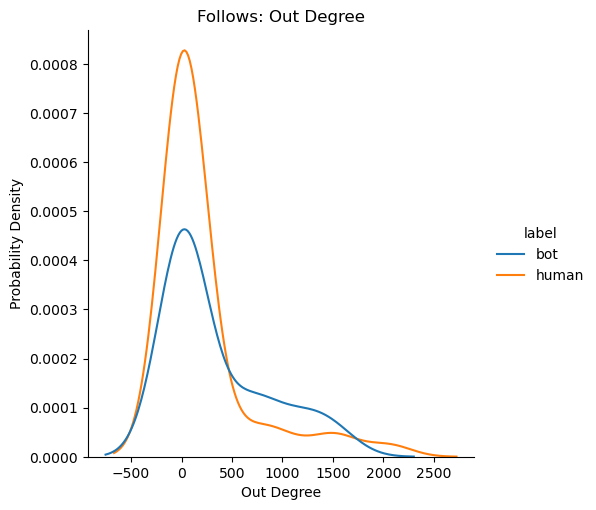

<Figure size 300x300 with 0 Axes>

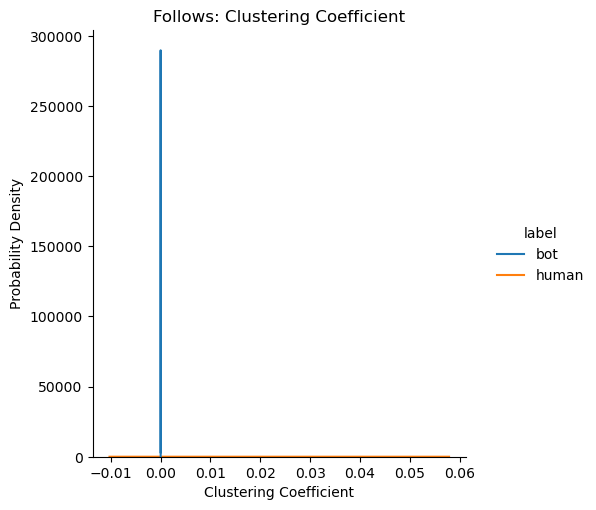

<Figure size 300x300 with 0 Axes>

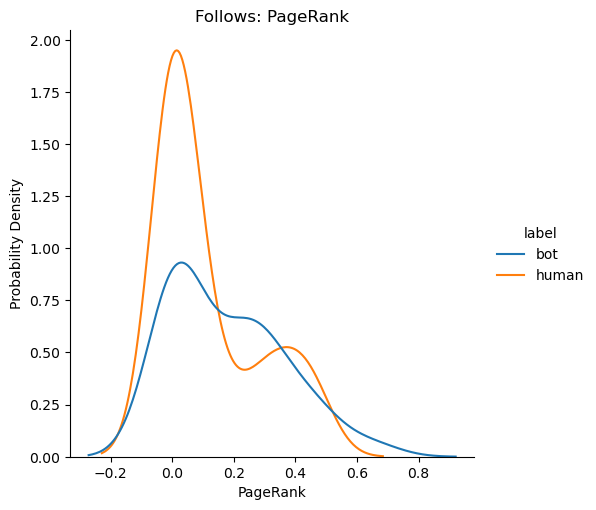

<Figure size 300x300 with 0 Axes>

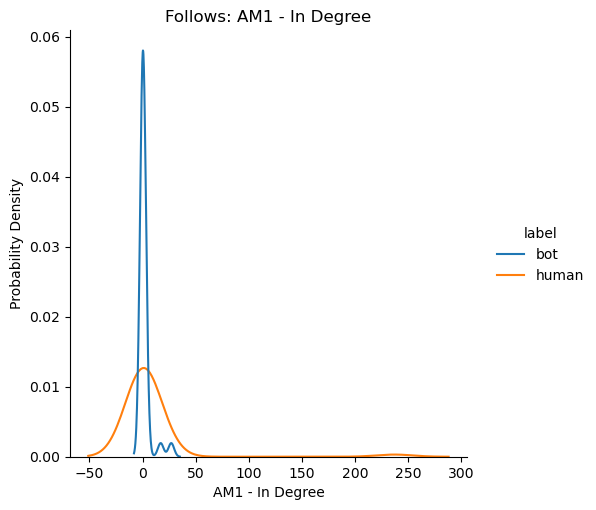

<Figure size 300x300 with 0 Axes>

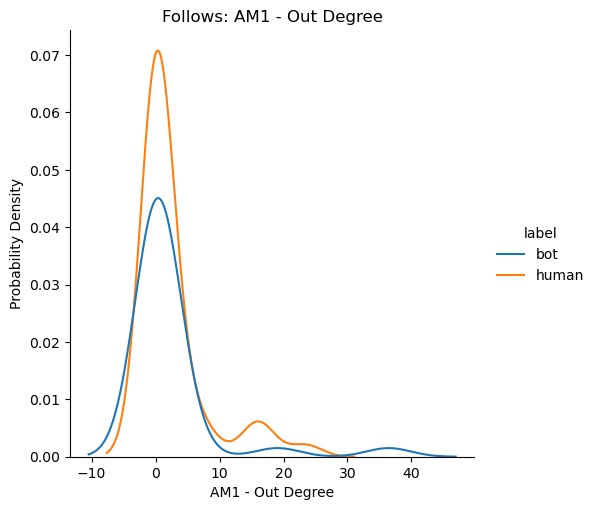

<Figure size 300x300 with 0 Axes>

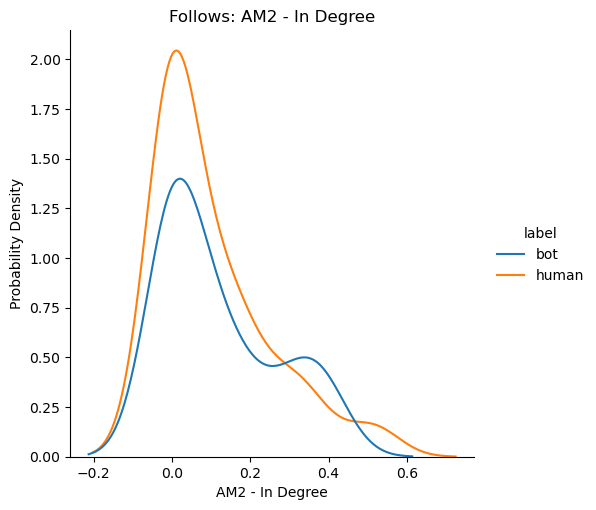

<Figure size 300x300 with 0 Axes>

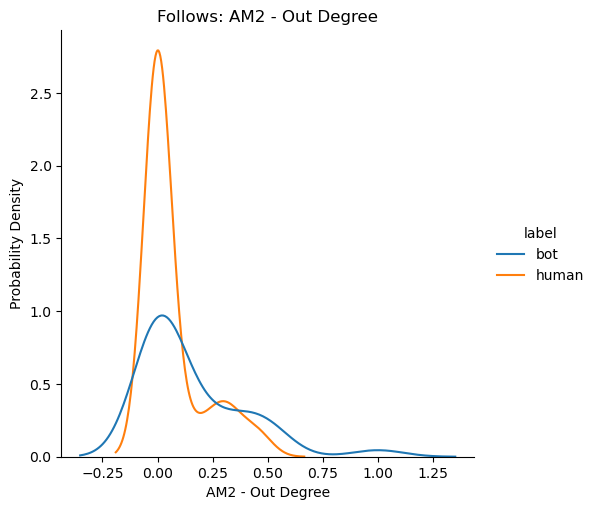

In [49]:
for net, d in zip(networks, n):
    for metric, name in zip(metrics,plt_metrics):
        plt.figure(figsize=(3, 3));
        sns.displot(d, x=metric, hue='label', kind="kde");
        plt.title(net.capitalize() + ': ' + name)
        plt.xlabel(name)
        plt.ylabel('Probability Density')
        plt.savefig('figures/displot-' + net + '-' + metric)